# Importing Libraries

In [2]:
#Imporitng the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Reading datasets from the csv files.

In [4]:
## Reading the csv file.
BoomBikes_df = pd.read_csv(r'C:\Users\Rushab\Documents\Hands on Python new\Machine Learning\Machine Learning assignment datasets\day.csv')

In [5]:
## Observing the first couple of rows.
BoomBikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
## Checking the shape of the data frame that is finding the number of rows and columns.
BoomBikes_df.shape

(730, 16)

In [7]:
## Finding the information of the dataset like the null values and the datatypes of all the attributes.
BoomBikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
## Checking missing values.
BoomBikes_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
## from the above data we can see that there are no null values.

In [10]:
## Using the describe function to find out details of the numerical datas.
BoomBikes_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
## Check the datas in the columns.
BoomBikes_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
## Checking the size of the datas present in the dataset.
BoomBikes_df.size

11680

In [13]:
## Checking the dimension of the data.
BoomBikes_df.ndim

2

In [14]:
## Check the values of the data.
BoomBikes_df.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

## Cleaning certain Datas from the datasets.

- The column instant is row index and wont be required in the analysis
- The 'dteday' column that is date column is to be removed as information like month, yr and weekend are present in other columns as well.
- Attributes like 'casual' and 'registered' are of no use during the predictions, as we have a attribute called 'cnt' which consists the sum of 'casual' and 'registered'. So having two more attributes will cause complexity in the problem.  

In [15]:
#Before dropping the 'dteday' column, we will introduce a new attribute 'daysold' variable which will describe how old is the business.
BoomBikes_df['daysold'] = (pd.to_datetime(BoomBikes_df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [16]:
BoomBikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,daysold
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [17]:
## Dropping column 'instant' as it is just a row index and will be of no use in the analysis.
BoomBikes_df.drop(['instant'], axis = 1, inplace = True)

In [18]:
## Dropping column 'dteday' column as information like month, yr and weekend are present in other columns as well.
BoomBikes_df.drop(['dteday'], axis = 1, inplace = True)

In [19]:
## Dropping the 'casual' and 'registered' columns as we have a 'cnt' column which has the sum of previously mentioned columns ans acts as a target variable for the same.
BoomBikes_df.drop(['casual'], axis = 1, inplace = True)
BoomBikes_df.drop(['registered'], axis = 1, inplace = True)

In [20]:
## Observing the dataframe after dropping the attributes.
BoomBikes_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,daysold
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [21]:
## From the above observation we can see that the mentioned columns are removed.

In [22]:
BoomBikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  daysold     730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


In [23]:
## We can observe from the below analysis and even throgh visually observing the above mentioned information that certain attributes like 'season' and 'weathersit' are numerical data instead of being categorical.

In [24]:
BoomBikes_df['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [25]:
BoomBikes_df['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

## Verifying the null values in the dataset.

In [26]:
## Checking if there are any null values in the attributes, although we know lets verify it once again.
BoomBikes_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
daysold       0
dtype: int64

## Handeling Outliers

In [27]:
## Finding the unique values in each columns.
BoomBikes_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
daysold       730
dtype: int64

In [28]:
## from the above observations we can see that there are few attributes in the datasets like temp, atemp, hum, windspeed, cnt and daysold.

Text(0.5, 1.0, 'Distibution for Temperature')

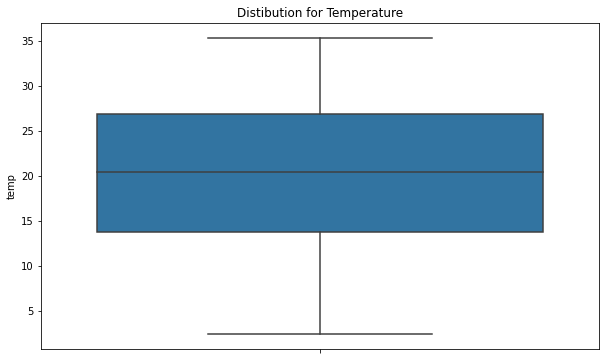

In [29]:
## Drawing a Boxplot for Temperature
plt.figure(figsize = [10,6]) 
sns.boxplot(data=BoomBikes_df,y='temp')
plt.title('Distibution for Temperature')

From the above analysis we can see that there are no Outliners.

Text(0.5, 1.0, 'Distibution for feeling temperature')

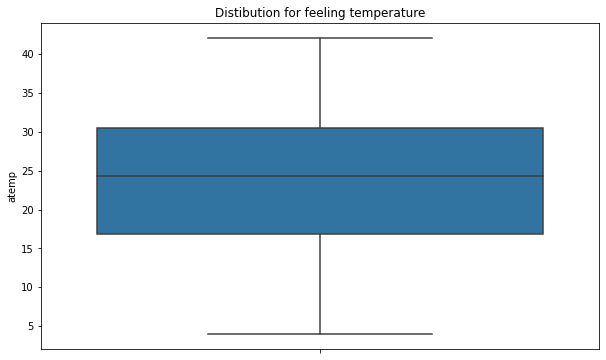

In [30]:
## Drawing a Boxplot for atemperature
plt.figure(figsize = [10,6]) 
sns.boxplot(data=BoomBikes_df,y='atemp')
plt.title('Distibution for feeling temperature')

From the above analysis we can see that there are no Outliners.

Text(0.5, 1.0, 'Distibution for humidity')

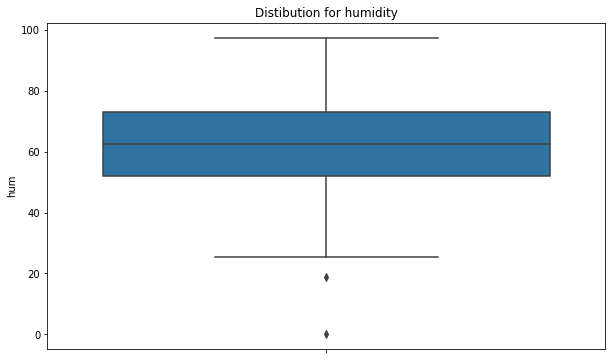

In [31]:
## Drawing a Boxplot for humidity
plt.figure(figsize = [10,6]) 
sns.boxplot(data=BoomBikes_df,y='hum')
plt.title('Distibution for humidity')

From the above analysis we can see that there are very few Outliners.

Text(0.5, 1.0, 'Distibution for windspeed')

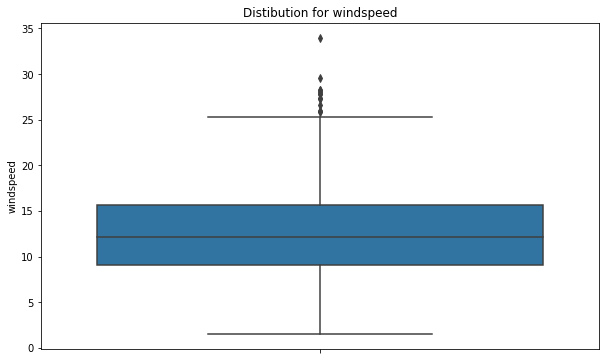

In [32]:
## Drawing a Boxplot for windspeed
plt.figure(figsize = [10,6]) 
sns.boxplot(data=BoomBikes_df,y='windspeed')
plt.title('Distibution for windspeed')

From the above analysis we can see that there are quite a few Outliners.

## EDA

In [33]:
## Converting the season, month, weekday and weathersit from numerical to categorical data type.

In [34]:
BoomBikes_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True) 

In [35]:
BoomBikes_df.mnth = BoomBikes_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

In [36]:
BoomBikes_df.weekday = BoomBikes_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

In [37]:
BoomBikes_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True) 

In [38]:
BoomBikes_df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,daysold
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,dec,0,fri,1,moderate,10.420847,11.33210,65.2917,23.458911,2114,725
726,spring,1,dec,0,sat,0,moderate,10.386653,12.75230,59.0000,10.416557,3095,726
727,spring,1,dec,0,sun,0,moderate,10.386653,12.12000,75.2917,8.333661,1341,727
728,spring,1,dec,0,mon,1,good,10.489153,11.58500,48.3333,23.500518,1796,728


### Univariate Analysis.

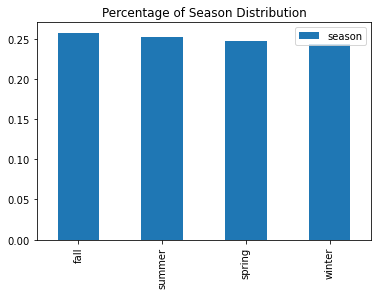

In [39]:
## Distribution of seasons using bar plots.
BoomBikes_df['season'].value_counts(normalize=True).plot.bar()
plt.legend()
plt.title("Percentage of Season Distribution")
plt.show()

In [40]:
## The above bar plots shows percentage distribution of various seasons in the dataset. 
## Here, the season fall has the higher percentaege count in comparision to other seasons.

In [41]:
BoomBikes_df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

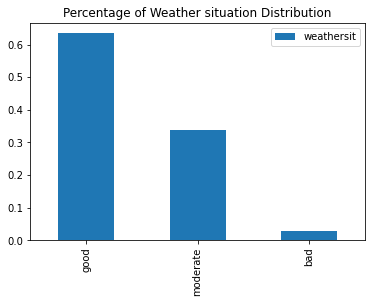

In [42]:
## Distribution of weathersit using bar plots.
BoomBikes_df['weathersit'].value_counts(normalize=True).plot.bar()
plt.legend()
plt.title("Percentage of Weather situation Distribution")
plt.show()

In [ ]:
## From the above analysis we can say that the Percentage of good weather that is Clear + Partially cloudy.

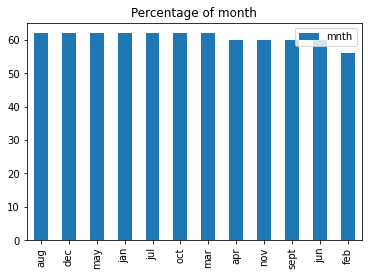

In [43]:
## Distribution of year using bar plots.
BoomBikes_df['mnth'].value_counts().plot.bar()
plt.legend()
plt.title("Percentage of month")
plt.show()

In [ ]:
## We can see that more or less the Distribution of the percentage count is simillar in all the months.

In [44]:
BoomBikes_df['mnth'].value_counts()

aug     62
dec     62
may     62
jan     62
jul     62
oct     62
mar     62
apr     60
nov     60
sept    60
jun     60
feb     56
Name: mnth, dtype: int64

## Bivariant/ Multivariant Analysis

In [45]:
## Drawing pair plots to check the linear relationship.

In [46]:
## Pairplots for numerical variables.

<Figure size 1008x2160 with 0 Axes>

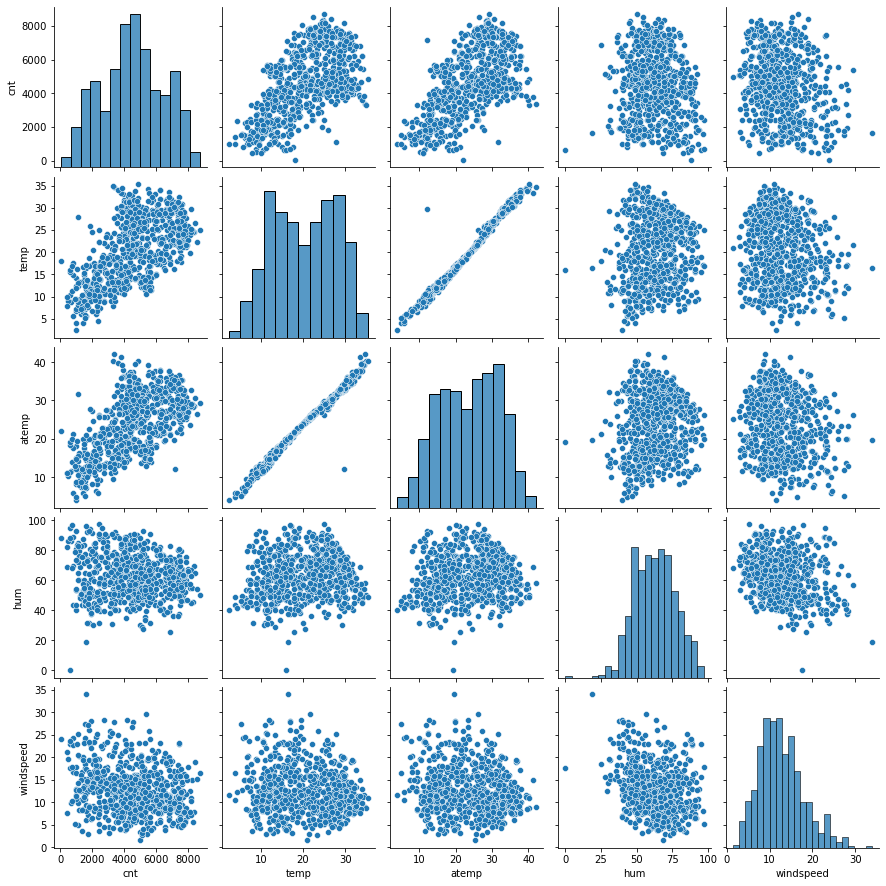

In [47]:
plt.figure(figsize = (14,30))
sns.pairplot(data=BoomBikes_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

### Observation:-
- We can see that 'temp' and 'atemp' are the two attributes that have the highest correlation with the target variable 'cnt'.
- We can also observe that 'temp' and 'atemp' are highly correlated with one another.

In [48]:
## from the above outcomes in correlation map, we can say that attributes like 'temp' and 'atemp' show linear relationship.

<Figure size 1296x1080 with 0 Axes>

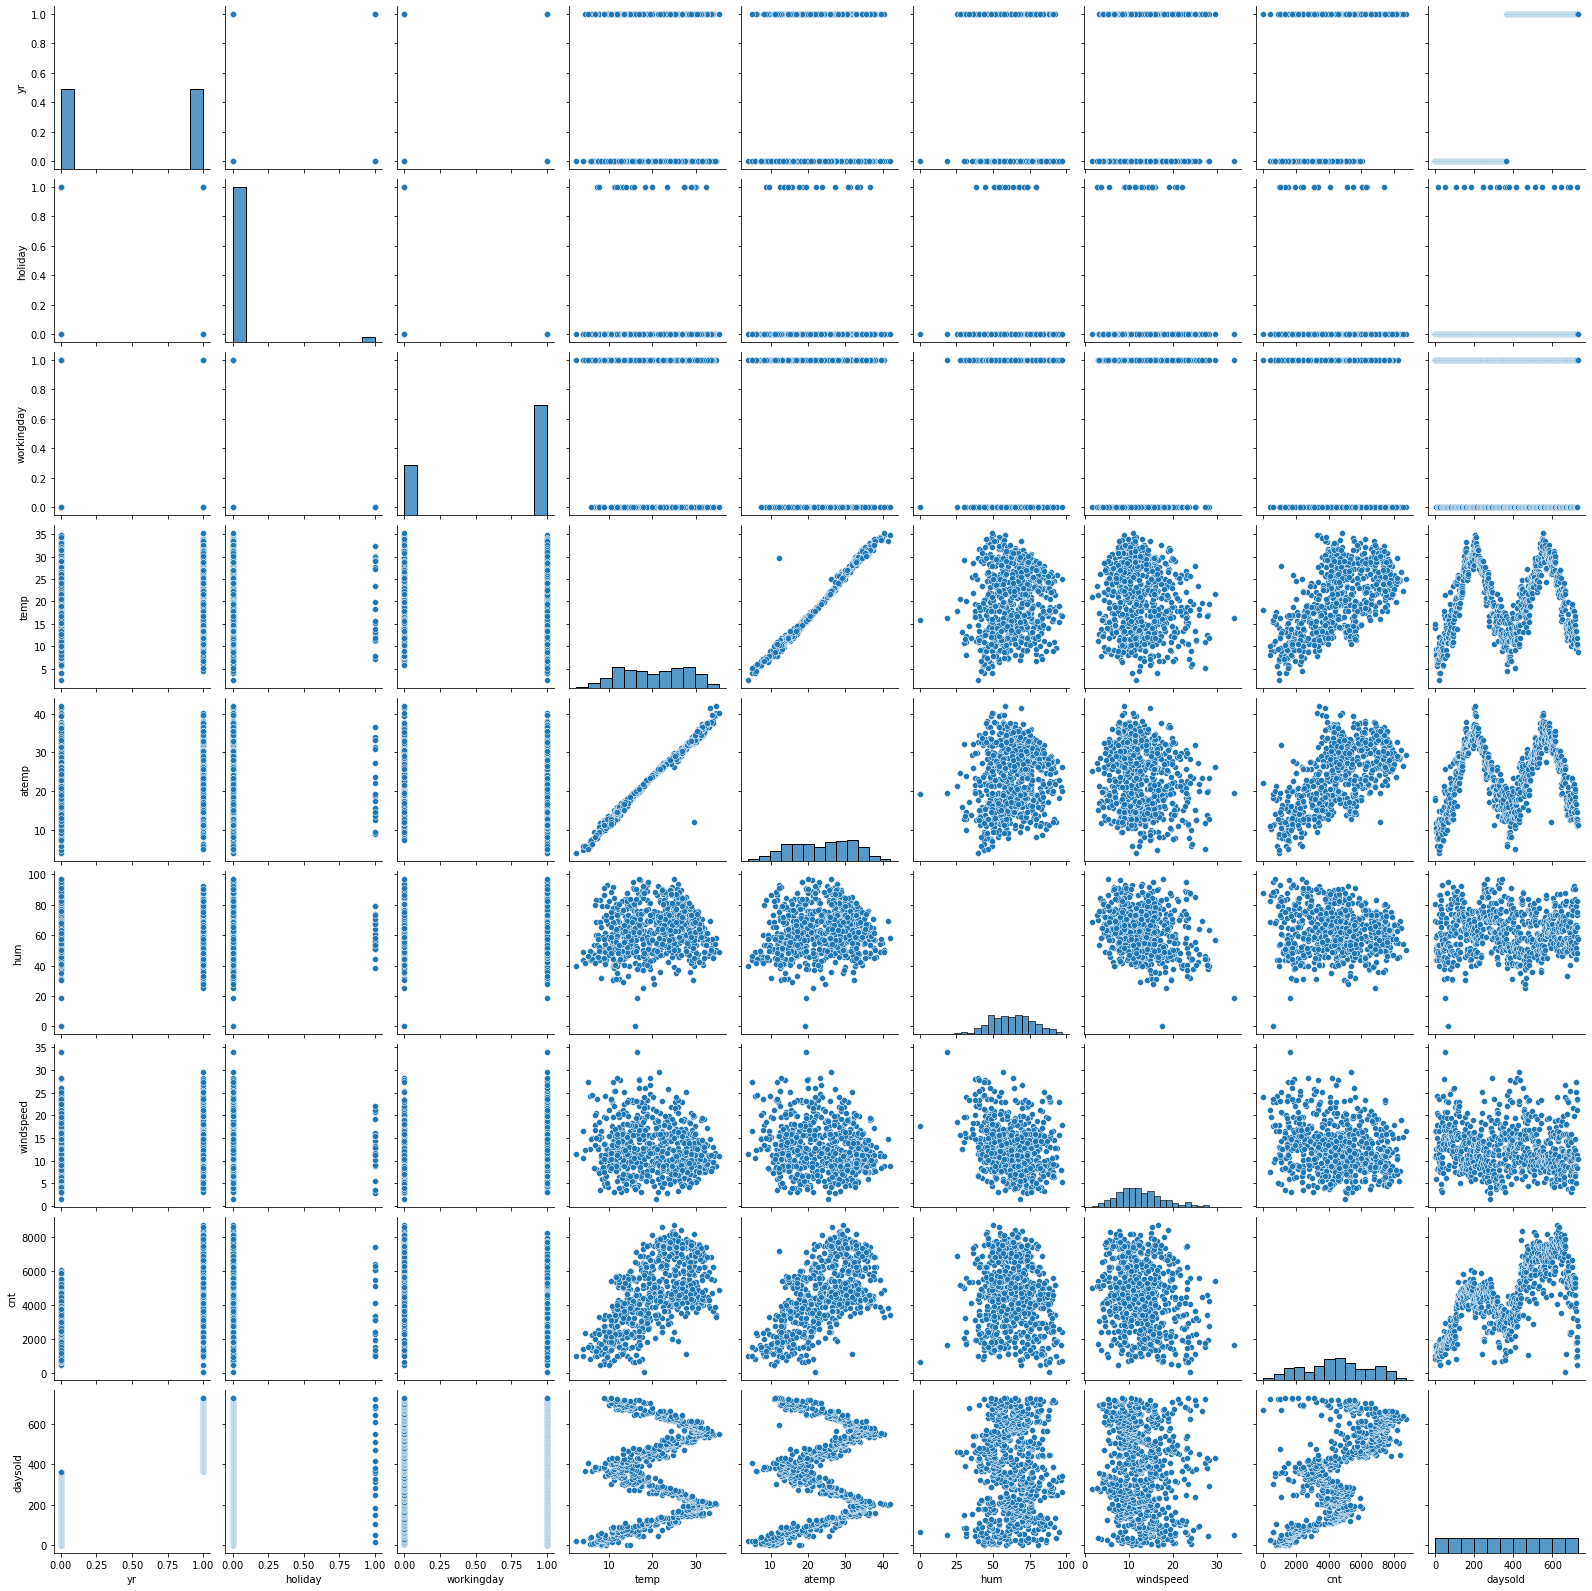

In [49]:
## Visualizing the data to find the correlation between them.
plt.figure(figsize=(18,15))
sns.pairplot(BoomBikes_df)
plt.show()

## Analyzing the Categorical Variables with the target variables.

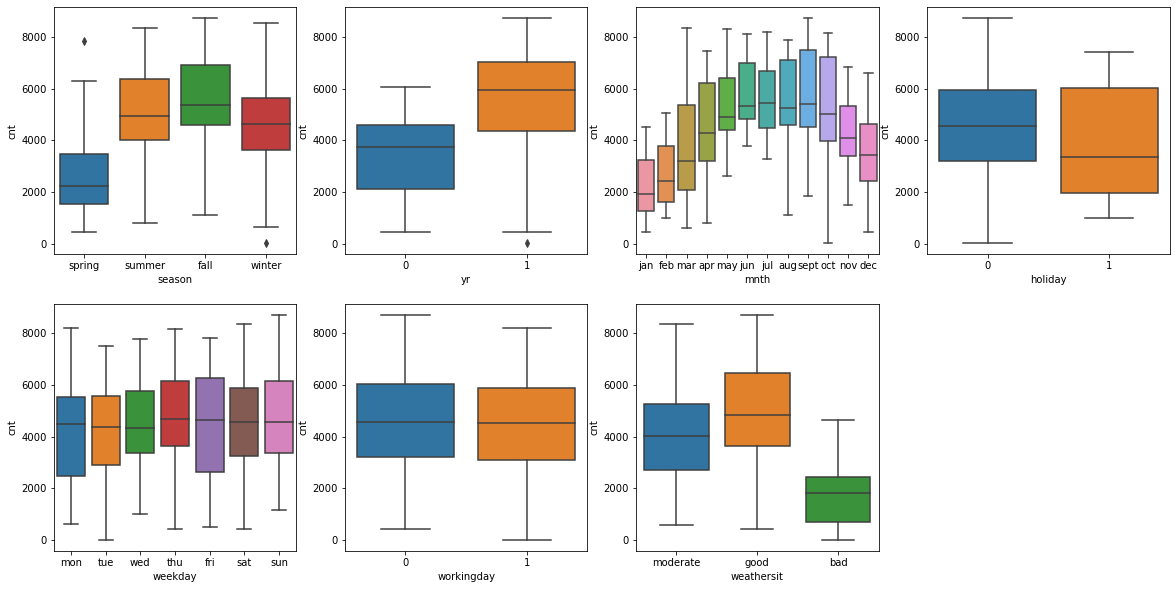

In [50]:
plt.figure(figsize=(20, 10))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = BoomBikes_df)  ## Preparing boxpolot of season with respect to cnt.

plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = BoomBikes_df)  ## Preparing boxpolot of year with respect to cnt.

plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = BoomBikes_df)  ## Preparing boxpolot of month with respect to cnt.

plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = BoomBikes_df)  ## Preparing boxpolot of holiday with respect to cnt.

plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = BoomBikes_df)  ## Preparing boxpolot of weekday with respect to cnt.

plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = BoomBikes_df)  ## Preparing boxpolot of workingday with respect to cnt.

plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = BoomBikes_df)  ## Preparing boxpolot of weathersit with respect to cnt.

plt.show()

#### Inference :-

- In the season attribute the 3 type that is 'fall' has the highest demand when it comes to renting bikes.
- In the 'yr' attribute we can see that the demand for BoomBikes have grown in the next year represented by 1.
- If we see the 'mnth' attribute it shows that the demand for BoomBikes are gradually increasing till June, post which we can see some irregulaity and we can see the demand is highest in the month of September.
- We can see in the 'holiday' attribute that if there is a holiday then the demand has decreased.
- On observing the 'weekday' attribute we cannot find a definate realtion with the demand of BoomBikes.
- The good label(with clear cloud or partial cloud) in the 'weathersit' attribute has the highest demand.
- We can say that the Bike demand is more during the month of September, we can say that the demand is less in the begining and end of the year due to the extreme weather conditions.

In [51]:
## Lets observe the attributes in greater depth and its relation with the target variable cnt.

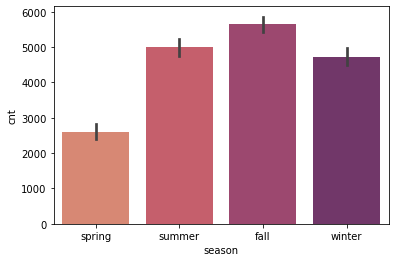

In [52]:
## Distribution of seasons with respect to the count.
sns.barplot('season','cnt',data=BoomBikes_df,palette="flare")
plt.show()

We can observe from the above plot that the bike retals are more in fall then compared to summer.

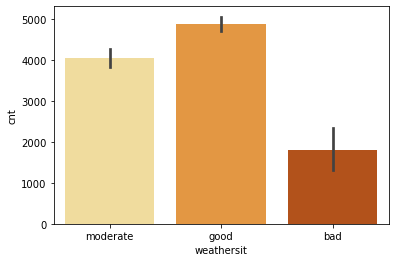

In [53]:
## Distribution of weather with respect to count for bike rentals.
sns.barplot('weathersit','cnt',data=BoomBikes_df,palette="YlOrBr")
plt.show()

From the above plot we can say that the bike rental for BoomBikes is better when the weather is good or partly cloudy.

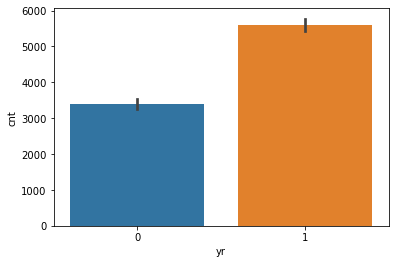

In [54]:
## Distribution of  Year with respect to count for bike rentals.
sns.barplot('yr','cnt',data=BoomBikes_df)
plt.show()

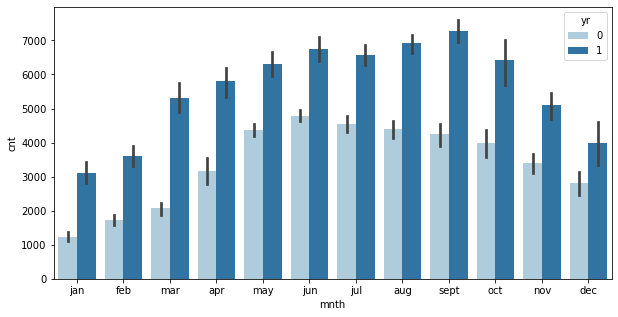

In [55]:
## Distribution of  Year with respect to count for bike rentals.
plt.figure(figsize=(10,5))
sns.barplot('mnth','cnt',hue='yr',data=BoomBikes_df,palette='Paired')
plt.show()


As per the above analysis bike rentals are more in 2019 compared to that in 2018.

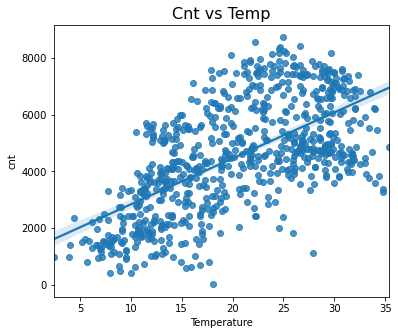

In [56]:
## Checking the Linear Relationship between Cnt(Count) and Temp(Temperature) attribute.
plt.figure(figsize=(6,5))
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=BoomBikes_df,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

#### Inference :-
- We can say that the demand for the BoomBikes are positively correlated with the temperature.
- We can also observe that the 'cnt' is linearly increasing which indicates linear relation.
- Bike rentals are more at higher temperature.

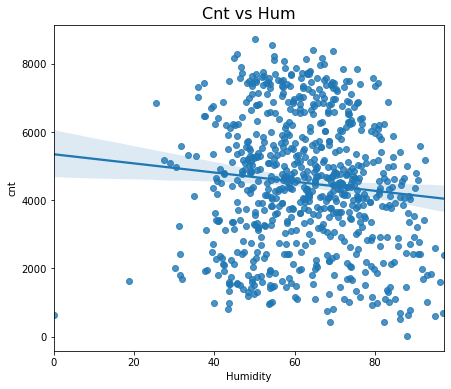

In [57]:
## Checking the Linear Relationship between Cnt(Count) and Hum(Humidity) attribute.
plt.figure(figsize=(7,6))
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=BoomBikes_df,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

#### Inference :-
- We can observe that the humidity values are more scattered around.
- We can also observe that the 'cnt' is decreasing with the increase in 'hum' that is humidity.

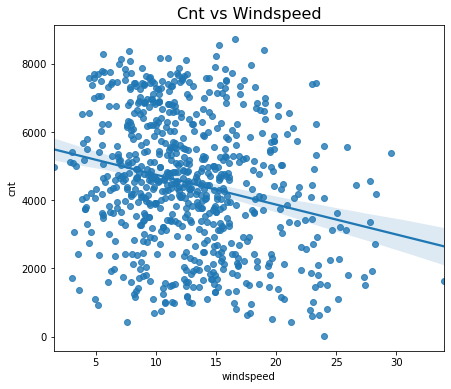

In [58]:
plt.figure(figsize=(7,6))
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=BoomBikes_df,y="cnt",x="windspeed")
plt.show()

#### Inference :-
- We can observe that the windspeed values are more scattered around.
- We can also observe that the 'cnt' is decreasing with the increase in 'windspeed'.

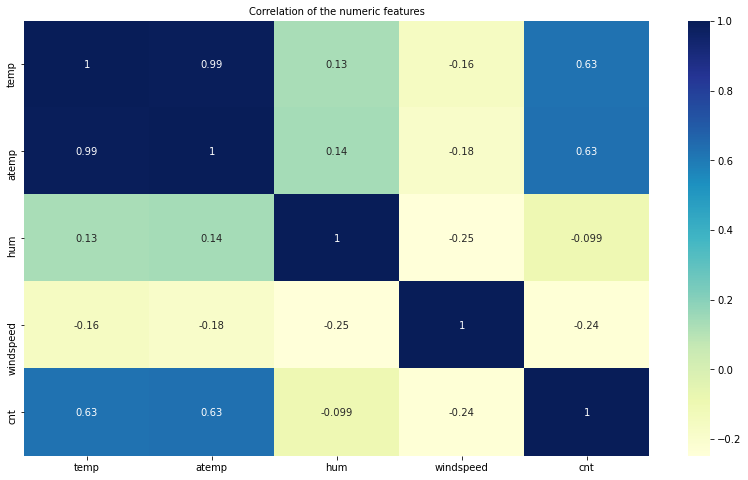

In [59]:
## Preparing the heatmap for the numeric features temp, atemp, cnt, hum and windspeed attributes.
plt.figure(figsize=(14,8))
num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.title("Correlation of the numeric features",fontsize=10)
sns.heatmap(BoomBikes_df[num_features].corr(),annot= True,cmap="YlGnBu")
plt.show()

#### Inference:-
- We can observe that both temp and atemp are highly correlated with each other, we can remove one of them, but lets keep them for further analysis.
- The attributes temp and atemp also shows that it has high correlation with cnt variable as well.

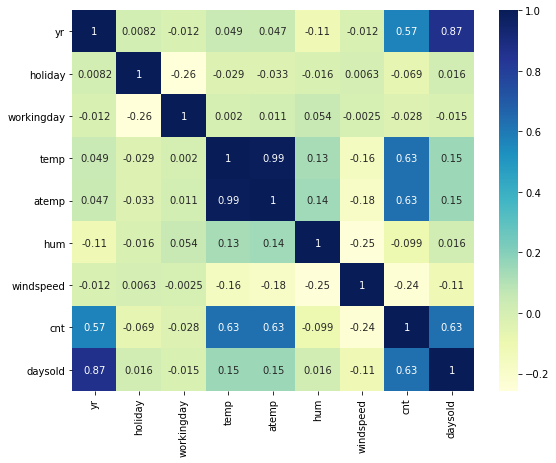

In [60]:
#Correlations for all the attributes in the BoomBikes dataframe.
plt.figure(figsize = [9,7])
corr_var=BoomBikes_df.corr()
sns.heatmap(corr_var, cmap="YlGnBu", annot = True)
plt.show()

In [61]:
## From the above correlation map we can observe that attributes like temp, atemp and daysold seems to be highly corelated.
## We can also see how the target variable 'cnt' has a linear relationship with some of the independent variable.

In [62]:
## from the above analysis we can see that both mean and 50%(median) are in almost the same range, which suggests that further analysis is good to go.

## Data Preparation for the Linear Regression.

#### Creation of Dummy variables for all the categorical attributes.

In [63]:
BoomBikes_df = pd.get_dummies(data=BoomBikes_df,columns=["season","mnth","weekday"],drop_first=True)
BoomBikes_df = pd.get_dummies(data=BoomBikes_df,columns=["weathersit"])

In [64]:
## The first column is dropped as (n-1) dummies can explain n categories.
## The first column in the weathersit is not removed to prevent the removal of any important information.

In [65]:
## Reviewing the columns after the creation of dummy variables.
BoomBikes_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'daysold', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [66]:
## Reviewing the dataframe after the dummy variable cretaion.
BoomBikes_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,daysold,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,0,1,0


## Model Building Steps :-

### Splitting the dataset into training set and the test set.

In [67]:
## Checking the shape and size before the split.
BoomBikes_df.shape

(730, 32)

In [68]:
BoomBikes_df.size

23360

In [69]:
## Splitting the dataset y and X sets

## Storing the target varibale in the 'y' variable.
y = BoomBikes_df.pop('cnt')

## Storing the remaining varibale in the 'X' variable.
X= BoomBikes_df

#Splitting the dataset into training and test as 70:30.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
## Inspecting the independent variables in the X variable.
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,daysold,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,0,0,1,0


In [71]:
## from the above observation you will note that the target variable is not a part of 'X' variable as it was split and stored in 'y'.

In [72]:
y.head() ## The 'y' variable consits of the target variable 'cnt'.

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [73]:
## Checking the shape of X_train and X_test
X_train.shape

(511, 31)

In [74]:
X_test.shape

(219, 31)

In [75]:
## Checking the shape of y_train and y_test
y_train.shape

(511,)

In [76]:
y_test.shape

(219,)

## Feature Scaling for the Continous variables

The following steps are done in order to bring all the features onto the same scale helping us with an easier interpretation.

In [77]:
## The attributes temp, hum, windspeed are continous and need to be scalled.

In [78]:
# Importing the required libraries.
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [79]:
## Scaling the continous variables.
numvar = ['temp','atemp','hum','windspeed','daysold']

## Using the normalalized scaler for the analysis.
scaler = MinMaxScaler()

## Using the fir and transform 
X_train[numvar] = scaler.fit_transform(X_train[numvar])

In [80]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,daysold,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.936900,0,0,...,0,0,0,0,0,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.884774,0,0,...,0,0,0,0,0,1,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.223594,0,1,...,0,0,0,0,0,0,1,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.493827,1,0,...,0,0,0,0,1,0,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.877915,0,0,...,0,0,0,0,1,0,0,0,0,1


In [81]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,daysold,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.698630,0.550874,0.526518,0.654174,0.414873,0.512409,0.230920,0.258317,...,0.09002,0.148728,0.142857,0.133072,0.135029,0.156556,0.133072,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.459303,0.227231,0.212976,0.143648,0.185619,0.292268,0.421834,0.438138,...,0.28649,0.356169,0.350270,0.339986,0.342090,0.363738,0.339986,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.254458,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.521262,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.770233,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [124]:
## from the above table we can see that the max is 1.0 for all the attributes which proves that the achived dataset is as per requirement and it can be used for further analysis.

## Model Building with RFE and Automated approach

We will use RFE to eliminate few of the columns from the training dataset.

In [82]:
# Building a Lienar Regression model using SKLearn for RFE.
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)

LinearRegression()

In [83]:
## Reducing the number of features to 15 using automated approach.
rfe = RFE(lr_reg,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [84]:
## Displaying the number of columns and there weight details selected via RFE.
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 15),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('daysold', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('mnth_aug', False, 4),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 11),
 ('mnth_jan', False, 7),
 ('mnth_jul', False, 12),
 ('mnth_jun', False, 5),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', False, 3),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 16),
 ('weekday_sun', False, 14),
 ('weekday_thu', False, 17),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 9),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 6)]

## Manual Elimination Method.

In [85]:
## Using statsmodel api to form a function to building models.

In [86]:
## the below function would take the columns to be selected for model as a parameter and apply features over it.
def building_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()  ## Using the OLS method to find the unknown parameters by creating a model which will decrease the sum of squared error between the observed and predicted data.
    print(lm.summary())
    return lm

In [87]:
## the below mentioned function is used to find the VIF and then it prints them.
def get_vif_model(cols):
    df_1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df_1.columns
    vif['VIF'] = [variance_inflation_factor(df_1.values, i) for i in range(df_1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [88]:
## Printing the columns selected by RFE. We will start with this column for manual elimination.
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'daysold',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [89]:
## Here we can see the features not selected by RFE.
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_nov', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_moderate'],
      dtype='object')

In [90]:
# Selecting the 15 columns supported by RFE for regression.
X_train_RFE = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

In [91]:
## Checking the shape of the X_train_RFE.
X_train_RFE.shape

(511, 15)

## Building Model

### Model 1

It consists of all the variables which were earlier selected by the RFE.

In [92]:
#Selected columns for Model 1 - all columns selected by RFE
cols1 = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

building_model(cols1)
get_vif_model(cols1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     165.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.70e-181
Time:                        17:10:28   Log-Likelihood:                -4134.9
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     495   BIC:                             8370.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2809.2461    

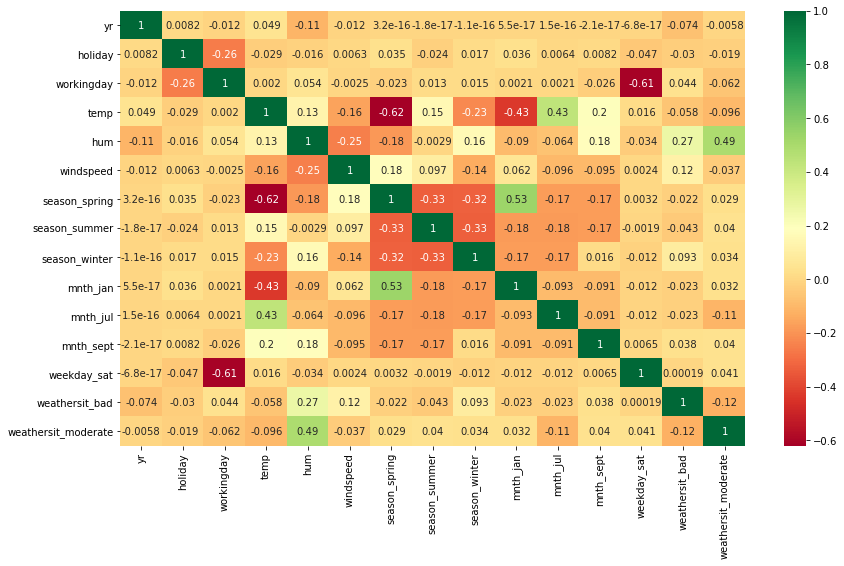

In [93]:
# Checking the correlation of the selected features found by RFE with target column.
plt.figure(figsize = (14,8))
sns.heatmap(BoomBikes_df[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']].corr(), cmap='RdYlGn', annot=True)
plt.show()

### Model 2

In [94]:
## Here we will be dropping the variable mnth_jan as it has negative coefficient.
## The varaible mnth_jan also has high p-value
cols1 = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
building_model(cols1)
get_vif_model(cols1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.1
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.35e-182
Time:                        17:10:29   Log-Likelihood:                -4135.0
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     496   BIC:                             8363.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2792.2799    

### Model 3

In [95]:
## Here we will be dropping the variable hum as it has negative coefficient.
## The varaible hum is insignificant as it has high p-value
cols1 = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
building_model(cols1)
get_vif_model(cols1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     183.6
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          3.37e-180
Time:                        17:10:29   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8315.
Df Residuals:                     497   BIC:                             8374.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2004.0762    

### Model 4

In [96]:
## Here we will be dropping the variable holiday as it has negative coefficient.
## The varaible holiday is insignificant as it has high p-value
cols1 = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
building_model(cols1)
get_vif_model(cols1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     193.1
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.51e-178
Time:                        17:10:29   Log-Likelihood:                -4150.1
No. Observations:                 511   AIC:                             8326.
Df Residuals:                     498   BIC:                             8381.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1845.8415    

### Model 5

In [97]:
## Here we will be dropping the variable season_spring as it has negative coefficient.
## The varaible season_spring is insignificant as it has high p-value.
cols = ['yr', 'workingday', 'temp', 'windspeed',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
building_model(cols)
get_vif_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     201.1
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.98e-175
Time:                        17:10:29   Log-Likelihood:                -4160.2
No. Observations:                 511   AIC:                             8344.
Df Residuals:                     499   BIC:                             8395.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 829.6239    

### Model 6

In [98]:
## Here we will be dropping the variable temp as it has negative coefficient.
## The varaible temp is insignificant as it has high p-value.
cols = ['yr', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
building_model(cols)
get_vif_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     156.8
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          4.14e-147
Time:                        17:10:29   Log-Likelihood:                -4229.9
No. Observations:                 511   AIC:                             8482.
Df Residuals:                     500   BIC:                             8528.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5070.0855    

### Model 7

In [99]:
## Here we will replace season_spring with July as both were highly correlated.

cols = ['yr', 'workingday', 'windspeed', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
building_model(cols)
get_vif_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     74.53
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           1.84e-92
Time:                        17:10:29   Log-Likelihood:                -4359.5
No. Observations:                 511   AIC:                             8741.
Df Residuals:                     500   BIC:                             8788.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3428.8800    

### Model 8

In [100]:
# Removing windspeed with spring as windspeed as it was highly correlated with temp
cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
building_model(cols)
get_vif_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     148.1
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.75e-142
Time:                        17:10:29   Log-Likelihood:                -4240.9
No. Observations:                 511   AIC:                             8504.
Df Residuals:                     500   BIC:                             8550.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4618.6083    

### Model 9

In [101]:
# We will add the weekend "Sunday" which was dropped during RFE instead of Saturday.

cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate']
building_model(cols)
get_vif_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     147.6
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          3.20e-142
Time:                        17:10:29   Log-Likelihood:                -4241.5
No. Observations:                 511   AIC:                             8505.
Df Residuals:                     500   BIC:                             8552.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4681.2816    

### Model 10

In [102]:
# adding temp and removed 'season_summer' and 'workingday'
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#['yr', 'holiday','temp', 'spring','winter', 'July','September','Sunday','Light_Snow_Rain','Mist_Clody']
building_model(cols)
get_vif_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.5
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          9.73e-178
Time:                        17:10:29   Log-Likelihood:                -4160.4
No. Observations:                 511   AIC:                             8341.
Df Residuals:                     501   BIC:                             8383.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1740.7372    

## Model 11

In [103]:
# Removing weekend_sun
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#['yr', 'holiday','temp', 'spring','winter', 'July','September','Sunday','Light_Snow_Rain','Mist_Clody']
building_model(cols)
get_vif_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     275.9
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.54e-178
Time:                        17:10:29   Log-Likelihood:                -4162.0
No. Observations:                 511   AIC:                             8342.
Df Residuals:                     502   BIC:                             8380.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1768.2553    

### Inference

- From the above analysis we can see that the VIF are preety low below the acceptance level.
- We can then observe that the p-value are almost 0.000 and the R2 is around 0.815.
- For further analysis we will select Model 11 as it has high R-Square, Adjusted R-squared and F-Statistics.
- We can observe that there are no insignificant variables and no multicollinear (high VIF) variables.
- We can also see that the difference between R2 and Adjusted-R2 is preety low which sujjests that the model is good to go.

In [104]:
## Building a function to select all the features automatically
def building_model_skl(X,y):
    lr_1 = LinearRegression()
    lr_1.fit(X,y)
    return lr_1

In [105]:
## Building a final model using sklearn.
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Build a model with above columns
lr = building_model_skl(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)


1768.2552600972936 [ 2001.22681426 -1173.79042894  -510.4915337    494.3823164
   469.72632731 -2267.51621398  -660.68218202  3975.95697567]


## Residual Analysis of the model.

In [106]:
lm = sm.OLS(y_train,X_train).fit()
y_train_pred = lm.predict(X_train)

Text(0.5, 0, 'Errors')

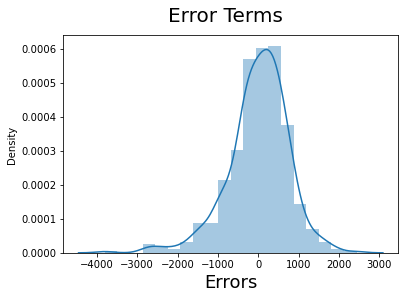

In [107]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

- The above distribution plot shows that the error terms are normally distributed.

In [108]:
## Finding the R2(R-Squared) value.
r2_score(y_train,y_train_pred)

0.8470377753934633

In [109]:
## The R2 value is much better then what was obtained before in training set.

In [110]:
## Checking linearity

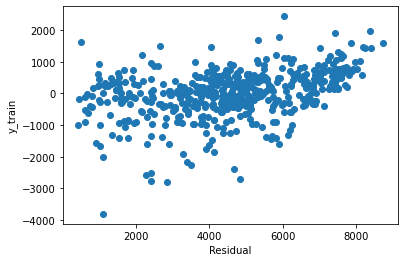

In [111]:
res = (y_train - y_train_pred)
plt.scatter(y_train,res)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

Text(0, 0.5, 'y_train_pred')

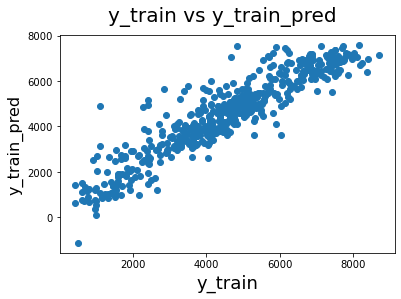

In [114]:
fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_train_pred', fontsize = 16)

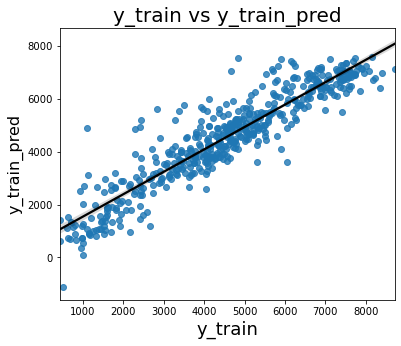

In [125]:
plt.figure(figsize=(6,5))
sns.regplot(x=y_train, y=y_train_pred, line_kws={"color": "black"})

plt.title('y_train vs y_train_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_pred', fontsize=16)                     # Y-label
plt.show()

- Homoskedasticity proved as the variance is constant.

In [115]:
### Predicting the values for the test dataset.
#Scale variables in X_test
num_variables = ['temp','atemp','hum','windspeed','daysold']

#Test data to be transformed only, no fitting
X_test[num_variables] = scaler.transform(X_test[num_variables])

In [116]:
#Columns from our final model
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

In [117]:
## R-Squared value for Test Dataset.
## Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8109384786253465

Text(0, 0.5, 'y_test_pred')

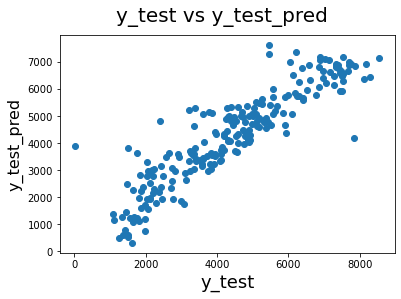

In [119]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                     # y-label


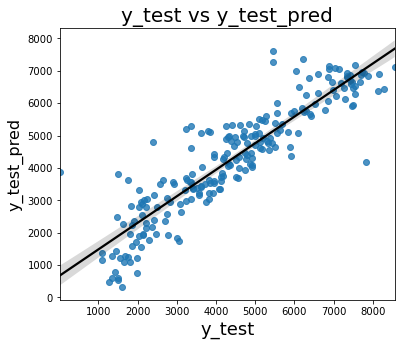

In [120]:
plt.figure(figsize=(6,5))
sns.regplot(x=y_test, y=y_test_pred, line_kws={"color": "black"})

plt.title('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                     # Y-label
plt.show()

## Comparision between Train and Test Model

- Train - R2     : 0.815
- Test  - R2     : 0.810
- The difference between train and test R2 is 0.5%

#### Hence, it is the best model.

## Interpretations:-

- We have derived a very effectieve model for the demand of BoomBikes with significant variables.

- If we observe the temperature variable we see that its has tge highest coeficient, meaning if the temperature increases with the derived coeficient of 3975.9750 the unit sale increases with the same amount.

- We can also observe the coefficients of other attributes that become a part of the best fited line.

- We can observe that there are few attributes that provide negative coefficient. The negative coefficient can be seen in attributes like spring, july, moderate(Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist) and bad(Light Snow, Light rain etc. 
  The coefficient values indicates how much of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant. 

## Business Goals:-

- Temperature could play as a big deciding factor for BoomBikes.
- We can observe and find out that the demand for the BoomBikes is greater in 2019 compared to 2018.
- The month of September and the winter season can have positive effect on the BoomBikes.
- On further observation from the above anaysis we can say that the spring season has a negative coefficients and is negatively correlated to the bike retals hampering Boombikes.
  So, we could provide offers and heavy discount in that season to attract more cusrtomers.
- Other attributes in weather situation like Mist+Cloudy and Light Snow or Light rain weathers also have negative correlation with the bike rentals.
  Hence we could also provide offers and discounts at those particular times.